In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import torch
import cv2

# Experimenting with Thresholding Techniques

In [2]:
def load_image(file_path):
    img = Image.open(file_path)
    return np.array(img)

In [3]:
test_img = load_image('/home/voyagerani/Desktop/BrewTex/Datasets/train-0/publaynet/train/PMC449901_00000.jpg')
print(test_img.shape)

(783, 594, 3)


True

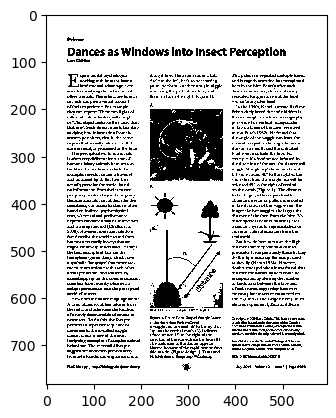

In [4]:
test_img_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
thresh1 = cv2.adaptiveThreshold(test_img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                          cv2.THRESH_BINARY, 199, 5) 

plt.imshow(thresh1, cmap = 'gray')
cv2.imwrite('/home/voyagerani/Desktop/BrewTex/AI model/Image augmentation/img1.jpg', thresh1)

True

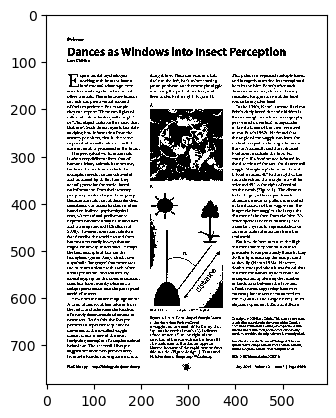

In [5]:
thresh1 = cv2.adaptiveThreshold(test_img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv2.THRESH_BINARY, 199, 5) 

plt.imshow(thresh1, cmap = 'gray')
cv2.imwrite('/home/voyagerani/Desktop/BrewTex/AI model/Image augmentation/img2.jpg', thresh1)

In [6]:
from skimage import io, img_as_ubyte
from skimage.color import rgb2gray
from skimage.filters import threshold_sauvola

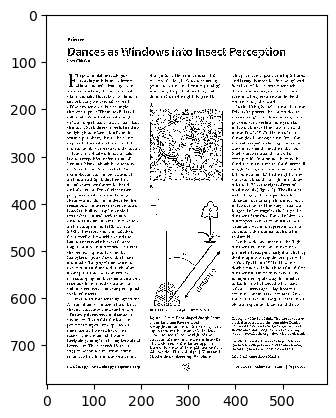

In [7]:
test_img_gray2 = rgb2gray(test_img)
sauvola_thresh = threshold_sauvola(test_img_gray2, window_size=5)
binary_image = test_img_gray2 > sauvola_thresh
binary_image_uint8 = (binary_image * 255).astype(np.uint8)

plt.imshow(binary_image, cmap = 'gray')
cv2.imwrite('/home/voyagerani/Desktop/BrewTex/AI model/Image augmentation/img3.jpg', binary_image_uint8)
plt.show()

In [8]:
#Mean adaptive thresholding is performing the best

True

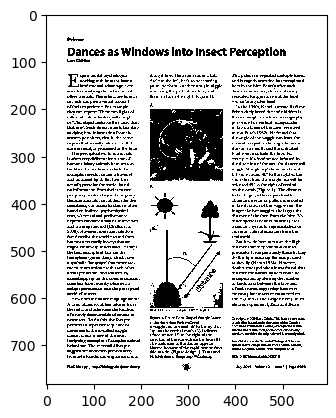

In [9]:
test_img2 = load_image('/home/voyagerani/Desktop/BrewTex/Datasets/train-0/publaynet/train/PMC538292_00000.jpg')
test_img_gray2 = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
thresh2 = cv2.adaptiveThreshold(test_img_gray2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                          cv2.THRESH_BINARY, 199, 5) 

plt.imshow(thresh2, cmap = 'gray')
cv2.imwrite('/home/voyagerani/Desktop/BrewTex/AI model/Image augmentation/img7_167_51.jpg', thresh2)

In [10]:
def load_image2(file_path):
    img = cv2.imread(file_path)
    return np.array(img)

True

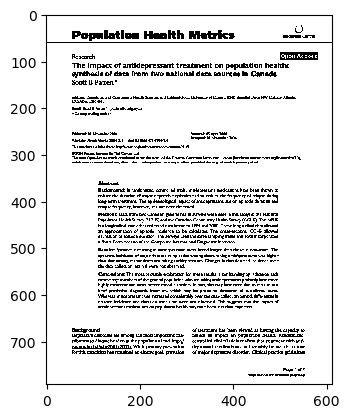

In [11]:
test_img2 = load_image('/home/voyagerani/Desktop/BrewTex/Datasets/train-0/publaynet/train/PMC538292_00000.jpg')
test_img_gray2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2GRAY)
thresh2 = cv2.adaptiveThreshold(test_img_gray2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                          cv2.THRESH_BINARY, 199, 5) 

plt.imshow(thresh2, cmap = 'gray')
cv2.imwrite('/home/voyagerani/Desktop/BrewTex/AI model/Image augmentation/img7_167_51.jpg', thresh2)

# Creating Function to Pre-Process images

In [12]:
images_directory = '/home/voyagerani/Desktop/BrewTex/Datasets/train-0/publaynet/train'
files = os.listdir(images_directory)

num_files = len(files)

print(num_files)

47958


In [13]:
from keras.preprocessing.image import ImageDataGenerator

2024-01-23 22:32:43.999467: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 22:32:44.315158: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa

In [15]:
def img_to_numpy(file_path):
    img = cv2.imread(file_path)
    return np.array(img)

def adaptive_mean_threshold(file_path):
    img = img_to_numpy(file_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                          cv2.THRESH_BINARY, 199, 5)
    return thresh

def Normalise_images(file_path):
    thresh = adaptive_mean_threshold(file_path)
    normalized_thresh = cv2.normalize(thresh, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return normalized_thresh

def image_augmentation(file_path):
    thresh = adaptive_mean_threshold(file_path)
    flip_param = iaa.Fliplr(p = 1.0)
    thresh_hflip = flip_param.augment_image(thresh)

    vflip_param = iaa.Flipud(p = 1.0)
    thresh_vflip = vflip_param.augment_image(thresh)

    rot_param = iaa.Affine(rotate=(-60, 20))
    thresh_rot = rot_param.augment_image(thresh)

    crop_param = iaa.Crop(percent = (0, 0.3))
    thresh_crop = crop_param.augment_image(thresh)

    noise_param = iaa.AdditiveGaussianNoise(10, 40)
    thresh_noise = noise_param.augment_image(thresh)

    zoom_param = iaa.Affine(scale=(1.0, 1.5))  # Zoom in by 50%
    thresh_zoom = zoom_param.augment_image(thresh)

    return thresh, thresh_hflip, thresh_vflip, thresh_rot, thresh_crop, thresh_noise, thresh_zoom

def augment_image(file_path):
    thresh_normalised = Normalise_images(file_path)
    
    
    return thresh_normalised

In [16]:
thresh, thresh_hflip, thresh_vflip, thresh_rot, thresh_crop, thresh_noise, thresh_zoom = image_augmentation('/home/voyagerani/Desktop/BrewTex/Datasets/train-0/publaynet/train/PMC517497_00003.jpg')

In [17]:
thresh_normalised = augment_image('/home/voyagerani/Desktop/BrewTex/Datasets/train-0/publaynet/train/PMC517497_00003.jpg')

True

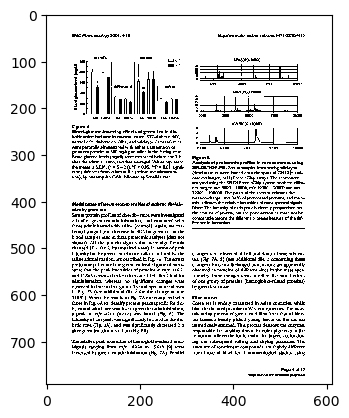

In [18]:
plt.imshow(thresh_normalised, cmap='gray')
cv2.imwrite('/home/voyagerani/Desktop/BrewTex/AI model/Image augmentation/img10.jpg', thresh_normalised)

# print(thresh_normalised)

In [19]:
import json

# Open the file in read mode
with open('/home/voyagerani/Desktop/BrewTex/Datasets/labels/publaynet/train.json', 'r') as f:
    samples = json.load(f)

In [21]:
# print("hello")
print("Number of keys: ", len(samples))
print("Keys: ", samples.keys())

Number of keys:  3
Keys:  dict_keys(['images', 'annotations', 'categories'])


In [22]:
# print(samples['categories']) #List of dictionaries 
# #The categories are text, title, list, table, figure
# print(samples['annotations'][0])
# #This has bounding box and category ID
# print(samples['images'][0]['file_name'])
# print(samples['images'][0]['id'])
# print(samples['annotations'][0])

image_id = samples['images'][0]['id']
annotations_for_image = [annotation for annotation in samples['annotations'] if annotation['image_id'] == image_id]
print(annotations_for_image, "\n")
# print(samples['annotations'][samples['images'][0]['id']])

[{'segmentation': [[52.38, 444.87, 291.97, 444.87, 291.97, 456.42, 291.97, 456.42, 291.97, 465.8, 291.97, 465.8, 291.97, 476.27, 291.97, 476.27, 291.97, 487.8, 291.97, 487.8, 291.97, 498.26, 86.41, 498.26, 86.41, 508.73, 40.42, 508.73, 40.42, 497.17, 40.42, 497.17, 40.42, 486.71, 40.42, 486.71, 40.42, 476.27, 40.42, 476.27, 40.42, 466.88, 40.42, 466.88, 40.42, 455.33, 52.38, 455.33, 52.38, 444.87]], 'area': 13787.433082525036, 'iscrowd': 0, 'image_id': 0, 'bbox': [40.42, 444.87, 251.55, 63.86], 'category_id': 1, 'id': 0}, {'segmentation': [[309.91, 444.91, 561.46, 444.91, 561.46, 456.42, 345.43, 456.42, 345.43, 466.88, 309.91, 466.88, 309.91, 456.42, 309.91, 456.42, 309.91, 444.91]], 'area': 3266.252633666969, 'iscrowd': 0, 'image_id': 0, 'bbox': [309.91, 444.91, 251.55, 21.97], 'category_id': 1, 'id': 1}, {'segmentation': [[52.38, 507.66, 291.97, 507.66, 291.97, 519.19, 291.97, 519.19, 291.97, 529.65, 291.97, 529.65, 291.97, 540.11, 40.42, 540.11, 40.42, 528.56, 40.42, 528.56, 40.42, 

In [23]:
annotations_for_image[0]['bbox']

[40.42, 444.87, 251.55, 63.86]

# Visualising the data

In [55]:
# Define color code
colors = {'title': (255, 0, 0),
          'text': (0, 255, 0),
          'figure': (0, 0, 255),
          'table': (255, 255, 0),
          'list': (0, 255, 255)}

In [56]:
from PIL import Image, ImageFont, ImageDraw

from glob import glob

In [57]:
font = ImageFont.load_default()

In [58]:
def textsize(text, font):
    im = Image.new(mode="P", size=(0, 0))
    draw = ImageDraw.Draw(im)
    _, _, width, height = draw.textbbox((0, 0), text=text, font=font)
    return width, height

In [59]:
# Function to viz the annotation
def markup(image, annotations):
    ''' Draws the segmentation, bounding box, and label of each annotation
    '''
    draw = ImageDraw.Draw(image, 'RGBA')
    for annotation in annotations:
        # Draw segmentation
        draw.polygon(annotation['segmentation'][0],
                     fill=colors[samples['categories'][annotation['category_id'] - 1]['name']] + (64,))
        # Draw bbox
        draw.rectangle(
            (annotation['bbox'][0],
             annotation['bbox'][1],
             annotation['bbox'][0] + annotation['bbox'][2],
             annotation['bbox'][1] + annotation['bbox'][3]),
            outline=colors[samples['categories'][annotation['category_id'] - 1]['name']] + (255,),
            width=2
        )
        # Draw label
        # w, h = draw.textlength(text=samples['categories'][annotation['category_id'] - 1]['name'], font=font)
        w, h = textsize(text=samples['categories'][annotation['category_id'] - 1]['name'], font=font)

        if annotation['bbox'][3] < h:
            draw.rectangle(
                (annotation['bbox'][0] + annotation['bbox'][2],
                 annotation['bbox'][1],
                 annotation['bbox'][0] + annotation['bbox'][2] + w,
                 annotation['bbox'][1] + h),
                fill=(64, 64, 64, 255)
            )
            draw.text(
                (annotation['bbox'][0] + annotation['bbox'][2],
                 annotation['bbox'][1]),
                text=samples['categories'][annotation['category_id'] - 1]['name'],
                fill=(255, 255, 255, 255),
                font=font
            )
        else:
            draw.rectangle(
                (annotation['bbox'][0],
                 annotation['bbox'][1],
                 annotation['bbox'][0] + w,
                 annotation['bbox'][1] + h),
                fill=(64, 64, 64, 255)
            )
            draw.text(
                (annotation['bbox'][0],
                 annotation['bbox'][1]),
                text=samples['categories'][annotation['category_id'] - 1]['name'],
                fill=(255, 255, 255, 255),
                font=font
            )
    return np.array(image)

In [1]:
images = {}
for image in samples['images']:
    images[image['id']] = {'file_name': "/home/voyagerani/Desktop/BrewTex/Datasets/train-0/publaynet/train/" + image['file_name'], 'annotations': []}
for ann in samples['annotations']:
    images[ann['image_id']]['annotations'].append(ann)

NameError: name 'samples' is not defined

In [61]:
# font = ImageFont.truetype("examples/DejaVuSans.ttf", 15)
fig=plt.figure(figsize=(16, 100)) 
for i, (_, image) in enumerate(images.items()):
    with Image.open(image['file_name']) as img:
        ax = plt.subplot(len(images) / 2, 2, i + 1)
        ax.imshow(markup(img, image['annotations']))
        ax.axis('off')
plt.subplots_adjust(hspace=0, wspace=0)

FileNotFoundError: [Errno 2] No such file or directory: '/home/voyagerani/Desktop/BrewTex/Datasets/train-0/publaynet/train/PMC3866684_00001.jpg'

In [ ]:
print(samples['annotations'][0])

{'segmentation': [[52.38, 444.87, 291.97, 444.87, 291.97, 456.42, 291.97, 456.42, 291.97, 465.8, 291.97, 465.8, 291.97, 476.27, 291.97, 476.27, 291.97, 487.8, 291.97, 487.8, 291.97, 498.26, 86.41, 498.26, 86.41, 508.73, 40.42, 508.73, 40.42, 497.17, 40.42, 497.17, 40.42, 486.71, 40.42, 486.71, 40.42, 476.27, 40.42, 476.27, 40.42, 466.88, 40.42, 466.88, 40.42, 455.33, 52.38, 455.33, 52.38, 444.87]], 'area': 13787.433082525036, 'iscrowd': 0, 'image_id': 0, 'bbox': [40.42, 444.87, 251.55, 63.86], 'category_id': 1, 'id': 0}
